In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.1.5'

In [3]:
nsmc_train_df = pd.read_csv('ratings_train.txt', encoding='utf8', sep='\t',engine='python')
nsmc_train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [4]:
nsmc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [5]:
nsmc_train_df = nsmc_train_df[nsmc_train_df['document'].notnull()]

In [6]:
nsmc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [7]:
nsmc_train_df['label'].value_counts()

0    75170
1    74825
Name: label, dtype: int64

In [8]:
import re

In [9]:
nsmc_train_df['document']=nsmc_train_df['document'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+'," ",x))
nsmc_train_df.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [10]:
nsmc_test_df = pd.read_csv('ratings_test.txt', encoding='utf8',sep='\t',engine='python')
nsmc_test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [11]:
nsmc_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [12]:
nsmc_test_df=nsmc_test_df[nsmc_test_df['document'].notnull()]

In [13]:
print(nsmc_test_df['label'].value_counts())

1    25171
0    24826
Name: label, dtype: int64


In [14]:
nsmc_test_df['document']=nsmc_test_df['document'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+',"",x))


In [15]:
from konlpy.tag import Okt
okt = Okt()

In [16]:
def okt_tokenizer(text):
    tokens=okt.morphs(text)
    return tokens

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, ngram_range=(1,2), min_df=3,max_df=0.9)
tfidf.fit(nsmc_train_df['document'])
nsmc_train_tfidf = tfidf.transform(nsmc_train_df['document'])

/Users/kimhyeona/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


로지스틱 회귀 기반 분석모델 생성

In [18]:
from sklearn.linear_model import LogisticRegression

SA_lr = LogisticRegression(random_state=0, max_iter=500)

In [19]:
SA_lr.fit(nsmc_train_tfidf, nsmc_train_df['label'])

LogisticRegression(max_iter=500, random_state=0)

로지스틱 회귀의 best 하이퍼파라미터 찾기

In [20]:
from sklearn.model_selection import GridSearchCV

params={'C':[1,3,3.5,4,4.5,5]}
SA_lr_grid_cv=GridSearchCV(SA_lr, param_grid=params, cv=3, scoring='accuracy', verbose=1)

최적 분석 모델 훈련

In [21]:
SA_lr_grid_cv.fit(nsmc_train_tfidf, nsmc_train_df['label'])

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.2min finished


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=500, random_state=0),
             param_grid={'C': [1, 3, 3.5, 4, 4.5, 5]}, scoring='accuracy',
             verbose=1)

In [22]:
print(SA_lr_grid_cv.best_params_, round(SA_lr_grid_cv.best_score_,4))

{'C': 3} 0.8553


In [23]:
#최적 파라미터의 best 모델 저장
SA_lr_best = SA_lr_grid_cv.best_estimator_

평가용 데이터를 이용해 감성 분석 모델 정확도

In [24]:
#평가용 데이터의 피처 벡터화
nsmc_test_tfidf = tfidf.transform(nsmc_test_df['document'])

In [25]:
test_predict = SA_lr_best.predict(nsmc_test_tfidf)

In [26]:
from sklearn.metrics import accuracy_score

print('감성 분석 정확도: ', round(accuracy_score(nsmc_test_df['label'],test_predict),3))

감성 분석 정확도:  0.857


새로운 텍스트에 대한 감성 예측

In [27]:
st = input('감성 분석할 문장입력 >> ')

감성 분석할 문장입력 >> 어이없어 재미없고 노잼 짜증나


In [28]:
# 입력 텍스트에 대한 전처리 수행

st = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(st)
print(st)
st=[" ".join(st)]
print(st)

['어이없어', '재미없고', '노잼', '짜증나']
['어이없어 재미없고 노잼 짜증나']


In [29]:
# 입력 텍스트의 피처 벡터화
st_tfidf = tfidf.transform(st)

# 최적 감성분석 모델에 적용하여 감성 분석 평가
st_predict = SA_lr_best.predict(st_tfidf)

In [30]:
# 예측 값 출력
if(st_predict == 0):
    print(st, '->> 부정 감성')
else :
    print(st, '->> 긍정 감성')

['어이없어 재미없고 노잼 짜증나'] ->> 부정 감성


In [31]:
import json

file_name='news'

with open(''+file_name+'.json',encoding='utf8') as j_f:
    data = json.load(j_f)

In [32]:
print(data)

[{'content': '이르면 내달부터 신입사원으로서 입사가 가능한 만큼, 취업준비생이라면 연말 접수에 속도를 내볼 것을 추천한다. 취업포털 인크루트가 이달 모집중인 주요기업 대졸신입 및 인턴 채용소식을 18일 안내한다. 먼저...', 'title': 'LS엠트론·아프리카TV 등.. 한파 뚫고 신입채용 계속'}, {'content': '대학 간 비교 시에는 졸업 후 취업률, 중도탈락률, 신입생 충원율 등 정량 지표를 주로 활용, 객관성을 유지할 계획이다. 수험생에게 어느 한 쪽으로 치우치지 않는 정보를 제공해 대학 선택에 도움을 주기 위해서다....', 'title': '[학과vs학과]신입생 선호도 건대 화공, 취업률은 경희대 앞서'}, {'content': '정규직 신입사원 선발을 위한 100% 비대면 화상면접을 진행한다. 이는 코로나19 확산세가 지속되고 있는... 얼어붙은 이때 한국공항공사가 취업준비생들에게 도움이 될 수 있도록 최선을 다할 계획"이라고 밝혔다.', 'title': '한국공항공사, 신입사원 채용 100% 비대면 화상면접 실시'}, {'content': 'B는 “제주항공에서 언제 부를지 모르고, 고용 한파가 부는 상황에서 다시 취업 전선에 뛰어들기도 막막하다”며 “지난해 비슷한 시기에 채용된 아시아나항공의 신입 인력은 입사 후 휴직으로 전환됐다. 그들처럼...', 'title': '400대1 뚫고도 1년째 입사대기...제주항공 신입 24명의 눈물'}, {'content': '예비 신입생들은 교수와 선배로부터 학과 교과 과정, 진로, 취업 등에 대한 조언을 얻을 수 있다. 또 학과 교수가 직접 참여하는 일대일 실시간 상담을 통해 입학부터 대학 생활, 졸업 후 취업까지 궁금한 점을 상담받을 수...', 'title': "선문대, 신입생 대상 '언택트 예비 대학' 운영"}, {'content': '고재선 취업지원실장(소방안전학과 교수)은 "코로나19로 다양한 학교생활을 경험하지 못한 신입생들에게 많은 도움이 됐을 것이다. 재학생들이\xa0지지적

In [33]:
data_title=[]
data_description=[]

for item in data:
    data_title.append(item['title'])
    data_description.append(item['content'])

In [34]:
data_title

['LS엠트론·아프리카TV 등.. 한파 뚫고 신입채용 계속',
 '[학과vs학과]신입생 선호도 건대 화공, 취업률은 경희대 앞서',
 '한국공항공사, 신입사원 채용 100% 비대면 화상면접 실시',
 '400대1 뚫고도 1년째 입사대기...제주항공 신입 24명의 눈물',
 "선문대, 신입생 대상 '언택트 예비 대학' 운영",
 '호원대 취업지원실, 진로또래멘토링 수기 공모전 시상식 개최',
 "‘라방’ 사옥투어, 아바타 인증샷…빅테크 '신입 환영법' 독특",
 '건설업계, 연말 막바지 채용...대림·서한 등 신입·경력모집 \xa0',
 '충남도립대·충남개발공사 취업 간담회',
 '국제대, 대학발전위원회 신입위원 위촉장 수여식 진행',
 '한뷰전, 글로벌 뷰티아티스트 양성을 위한 2021학년도 신입생 모집',
 '선문대 예비 신입생과 실시간 대화 나눈다···이색적인 언택트 예비대학 눈길',
 "[기고]맞춤형 '일학습병행' 코로나 시대 취업 뽀개기",
 'SBI저축銀, 대졸신입 수시채용에 비대면 화상면접 도입',
 '국제대 대학발전위원회, 신입위원 위촉장 수여식 가져',
 '“100번을 두드려도 안 열린 취업 문…그래도 취준생인 게 감사” 왜?',
 "각종 시험 잇단 취소…취업준비생 '혼란'",
 "[2021 경제정책방향](청년 일자리) 공공기관 신입 5% 이상, '일 경험 사업' 청년 뽑는다",
 '[대학소식]대구공대, 신입생 대상 진로특강 등',
 "세상을 '이미' 바꾼 SW교육…장애학생 취업 돕고, 마스크 재고 알리고",
 '"기업 연계한 맞춤교육으로 취업률 72%… 해외 일자리 기회도" [현장르포]',
 '용인송담대, 지역청년 지원 취업 프로그램 진행',
 "장안대 '2020 하반기 취업스킬 경진대회' 개최",
 '숭실대 글로벌미래교육원, 지방학생 인터넷접수 100% 면접전형 신입생 선발',
 '신입/경력 채용.. 에스엘 동우화인켐 삼양식품 잡코리아 등\xa0',
 '현대건설, 교육운영·영상제작 분야 신입·경력직 채용',
 '에듀윌 취업, \'IBK기업은행

In [35]:
data_description

['이르면 내달부터 신입사원으로서 입사가 가능한 만큼, 취업준비생이라면 연말 접수에 속도를 내볼 것을 추천한다. 취업포털 인크루트가 이달 모집중인 주요기업 대졸신입 및 인턴 채용소식을 18일 안내한다. 먼저...',
 '대학 간 비교 시에는 졸업 후 취업률, 중도탈락률, 신입생 충원율 등 정량 지표를 주로 활용, 객관성을 유지할 계획이다. 수험생에게 어느 한 쪽으로 치우치지 않는 정보를 제공해 대학 선택에 도움을 주기 위해서다....',
 '정규직 신입사원 선발을 위한 100% 비대면 화상면접을 진행한다. 이는 코로나19 확산세가 지속되고 있는... 얼어붙은 이때 한국공항공사가 취업준비생들에게 도움이 될 수 있도록 최선을 다할 계획"이라고 밝혔다.',
 'B는 “제주항공에서 언제 부를지 모르고, 고용 한파가 부는 상황에서 다시 취업 전선에 뛰어들기도 막막하다”며 “지난해 비슷한 시기에 채용된 아시아나항공의 신입 인력은 입사 후 휴직으로 전환됐다. 그들처럼...',
 '예비 신입생들은 교수와 선배로부터 학과 교과 과정, 진로, 취업 등에 대한 조언을 얻을 수 있다. 또 학과 교수가 직접 참여하는 일대일 실시간 상담을 통해 입학부터 대학 생활, 졸업 후 취업까지 궁금한 점을 상담받을 수...',
 '고재선 취업지원실장(소방안전학과 교수)은 "코로나19로 다양한 학교생활을 경험하지 못한 신입생들에게 많은 도움이 됐을 것이다. 재학생들이\xa0지지적인 관계를 형성하고 진로 고민을 나눌 방안을 계속해서 모색할 것...',
 '신종 코로나바이러스 감염증(코로나19) 확산이 신입사원 교육 방식도 바꾸고 있다. 지난 3월 이후 취업자 수가 9개월 연속 줄어들 정도로 채용시장은 꽁꽁 얼어붙었지만, 네이버·카카오·NHN 등 국내 주요 IT기업의 경우...',
 '17일 건설취업플랫폼 건설워커에 따르면 대림건설, 서한, 대방건설, 서한, 에스엠상선·건설부문 등이 채용을... 대방건설이 신입 및 경력사원을 모집한다. 모집부문은 관리, 건축, 주택 등이며 22일까지 회사 채용...'

In [36]:
data_df = pd.DataFrame({'title': data_title, 'description':data_description})

한글 이외 문자 제거

In [37]:
data_df['title']=data_df['title'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+'," ", x))
data_df['description']=data_df['description'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+'," ", x))

data_df.head()

,title,description
0,엠트론 아프리카 등 한파 뚫고 신입채용 계속,이르면 내달부터 신입사원으로서 입사가 가능한 만큼 취업준비생이라면 연말 접수에 속...
1,학과 학과 신입생 선호도 건대 화공 취업률은 경희대 앞서,대학 간 비교 시에는 졸업 후 취업률 중도탈락률 신입생 충원율 등 정량 지표를 ...
2,한국공항공사 신입사원 채용 비대면 화상면접 실시,정규직 신입사원 선발을 위한 비대면 화상면접을 진행한다 이는 코로나 확산세가...
3,대 뚫고도 년째 입사대기 제주항공 신입 명의 눈물,는 제주항공에서 언제 부를지 모르고 고용 한파가 부는 상황에서 다시 취업 전선...
4,선문대 신입생 대상 언택트 예비 대학 운영,예비 신입생들은 교수와 선배로부터 학과 교과 과정 진로 취업 등에 대한 조언을 ...


title에 대한 감성 분석

In [38]:
# 분석할 데이터의 피처 벡터화 <<title>> 분석
data_title_tfidf = tfidf.transform(data_df['title'])

# 최적 파라미터 학습모델에 적용해 감성 분석
data_title_predict = SA_lr_best.predict(data_title_tfidf)

# 감성 분석 결과값을 데이터 프레임에 저장
data_df['title_label']=data_title_predict

description에 대한 감성 분석

In [39]:
# 분석할 데이터의 피처 벡터화 <<description>> 분석
data_description_tfidf = tfidf.transform(data_df['description'])

# 최적 파라미터 학습모델에 적용해 감성 분석
data_description_predict = SA_lr_best.predict(data_description_tfidf)

# 감성 분석 결과값을 데이터 프레임에 저장
data_df['description_label']=data_description_predict

분석 결과가 추가된 데이터프레임을 csv 파일로 저장

In [40]:
data_df.to_csv(''+file_name+'.csv',encoding='euc-kr')

감성분석 결과 확인


In [41]:
data_df.head()

,title,description,title_label,description_label
0,엠트론 아프리카 등 한파 뚫고 신입채용 계속,이르면 내달부터 신입사원으로서 입사가 가능한 만큼 취업준비생이라면 연말 접수에 속...,1,1
1,학과 학과 신입생 선호도 건대 화공 취업률은 경희대 앞서,대학 간 비교 시에는 졸업 후 취업률 중도탈락률 신입생 충원율 등 정량 지표를 ...,1,0
2,한국공항공사 신입사원 채용 비대면 화상면접 실시,정규직 신입사원 선발을 위한 비대면 화상면접을 진행한다 이는 코로나 확산세가...,1,1
3,대 뚫고도 년째 입사대기 제주항공 신입 명의 눈물,는 제주항공에서 언제 부를지 모르고 고용 한파가 부는 상황에서 다시 취업 전선...,1,1
4,선문대 신입생 대상 언택트 예비 대학 운영,예비 신입생들은 교수와 선배로부터 학과 교과 과정 진로 취업 등에 대한 조언을 ...,0,1


In [42]:
print(data_df['title_label'].value_counts())

0    276
1    223
Name: title_label, dtype: int64


In [43]:
print(data_df['description_label'].value_counts())

0    255
1    244
Name: description_label, dtype: int64


결과 저장 : 긍정과 부정을 분리하여 csv파일 저장

In [44]:
columns_name = ['title','title_label', 'description','description_label']
NEG_data_df = pd.DataFrame(columns=columns_name)
POS_data_df = pd.DataFrame(columns=columns_name)

for i, data in data_df.iterrows():
    title = data['title']
    description = data['description']
    t_label=data['title_label']
    d_label=data['description_label']
    
    if d_label==0: #부정 감성 샘플만 추출
        NEG_data_df = NEG_data_df.append(pd.DataFrame([[title, t_label, description, d_label]],columns=columns_name),ignore_index=True)
    else : #긍정 감성 샘플만 추출
        POS_data_df = POS_data_df.append(pd.DataFrame([[title, t_label, description, d_label]],columns=columns_name),ignore_index=True)
        
# 파일에 저장
NEG_data_df.to_csv(''+file_name+'_NES.csv', encoding='euc-kr')
POS_data_df.to_csv(''+file_name+'_POS.csv', encoding='euc-kr')

In [45]:
len(NEG_data_df), len(POS_data_df)

(255, 244)

감성 분석 결과 확인 및 시각화

바 차트

명사만 추출하여 정리하기

-긍정 감성의 데이터에서 명사만 추출하여 정리

In [46]:
POS_description = POS_data_df['description']

In [47]:
POS_description_noun_tk = []

for d in POS_description:
    POS_description_noun_tk.append(okt.nouns(d)) #형태소가 명사인 것만 추출

In [48]:
print(POS_description_noun_tk) 

[['내달', '신입사원', '입사', '만큼', '취업', '준비', '생', '라면', '연말', '접수', '속도', '볼', '것', '추천', '취업', '포털', '인크루트', '달', '집중', '기업', '대졸', '신입', '및', '인턴', '채용', '소식', '일', '안내', '먼저'], ['정규직', '신입사원', '선발', '위', '비대', '화상', '면접', '진행', '코로나', '확산', '세', '지속', '때', '한국', '항공사', '취업', '준비', '생', '도움', '수', '최선', '계획'], ['제주항공', '언제', '고용', '한파', '상황', '다시', '취업', '전선', '기도', '며', '지난해', '시기', '채용', '아시아나', '항공', '신입', '인력', '입사', '후', '휴직', '전환', '그'], ['예비', '신입생', '교수', '선배', '로부터', '학과', '교과', '과정', '진로', '취업', '등', '대한', '조언', '수', '또', '학과', '교수', '직접', '참여', '일대일', '실시간', '상담', '통해', '입학', '대학', '생활', '졸업', '후', '취업', '점', '상담', '수'], ['신종', '코로나바이러스', '감염증', '코로나', '확산', '신입사원', '교육', '방식', '지난', '월', '이후', '취업', '수가', '개월', '연속', '정도', '채용', '시장', '꽁꽁', '네이버', '카카오', '등', '국내', '주요', '기업', '경우'], ['일', '건설', '취업', '플랫폼', '건설', '워커', '대림', '건설', '서한', '대방', '건설', '서한', '에스', '엠', '상선', '건설', '부문', '등', '채용', '대방', '건설', '신입', '및', '력사', '모집', '모집', '부문', '관리', '건축', '주택', '등', '일', '회사', '채

In [49]:
POS_description_noun_join=[]

for d in POS_description_noun_tk:
    d2 = [w for w in d if len(w) > 1] # 길이가 1인 토큰은 제외
    POS_description_noun_join.append(" ".join(d2)) # 토큰을 연결(join)하여 리스트 구성

In [50]:
print(POS_description_noun_join)

['내달 신입사원 입사 만큼 취업 준비 라면 연말 접수 속도 추천 취업 포털 인크루트 집중 기업 대졸 신입 인턴 채용 소식 안내 먼저', '정규직 신입사원 선발 비대 화상 면접 진행 코로나 확산 지속 한국 항공사 취업 준비 도움 최선 계획', '제주항공 언제 고용 한파 상황 다시 취업 전선 기도 지난해 시기 채용 아시아나 항공 신입 인력 입사 휴직 전환', '예비 신입생 교수 선배 로부터 학과 교과 과정 진로 취업 대한 조언 학과 교수 직접 참여 일대일 실시간 상담 통해 입학 대학 생활 졸업 취업 상담', '신종 코로나바이러스 감염증 코로나 확산 신입사원 교육 방식 지난 이후 취업 수가 개월 연속 정도 채용 시장 꽁꽁 네이버 카카오 국내 주요 기업 경우', '건설 취업 플랫폼 건설 워커 대림 건설 서한 대방 건설 서한 에스 상선 건설 부문 채용 대방 건설 신입 력사 모집 모집 부문 관리 건축 주택 회사 채용', '학과 시간 예비 신입생 학과 교과 과정 진로 취업 대해 교수 선배 로부터 정보 전달 학과 교수 직접 참여 일대일 실시간 상담 통해 입학', '신입사원 이내 퇴사 비율 이상 재직 비율 수준 현실 고교 재학 기업 채용 문학사 취득 취업 학습 학습 병행 참여', '저축은행 대졸 신입 채용 비대 화상 면접 제도 도입 이번 전형 신종 취업 준비 어려움 채용 시스템 도입 통해 효율 성과', '지난달 취업 포털 인크루트 관련 조사 결과 국내 기업 올해 대졸 신입사원 명도 아래 자릿수 채용 자릿수', '취업 준비 혼란 사회 거리 두기 조치 공간 미만 수험생 반면 기업은행 고심 여명 응시 대상 하반기 신입 공채 필기 시험', '코로나 사태 취업 기회 청년 위해 정부 먼저 직무 경험 취업 고용 사다리 취지 정부 발표 경제정책 방향 청년 경험', '소프트웨어 교육 통해 명의 장애 학생 취업 특수 교사 영광 제자 게다가 업체 훈련 신입 직원 훈련 제공 요청 현장', '학교 장점 기업 통한 취업률 진학 역시 취업 신입사원 경우 중국 미국 해외 지점 열사 개월 해외 연수 기회

부정 감성의 데이터에서 명사만 추출하여 정리

In [51]:
NEG_description = NEG_data_df['description']

NEG_description_noun_tk = []
NEG_description_noun_join = []

for d in NEG_description:
    NEG_description_noun_tk.append(okt.nouns(d)) #형태소가 명사인 것만 추출

for d in NEG_description_noun_tk:
    d2 = [w for w in d if len(w) > 1] #길이가 1인 토큰은 제외
    NEG_description_noun_join.append(" ".join(d2)) # 토큰을 연결하여 리스트 구성
    

In [52]:
print(NEG_description_noun_join)

['대학 비교 졸업 취업률 중도 탈락 신입생 정량 지표 주로 활용 객관성 유지 계획 수험생 정보 제공 대학 선택 도움 주기', '고재선 취업 지원 실장 소방 안전 학과 교수 코로나 학교생활 경험 신입생 도움 재학생 지지 관계 형성 진로 고민 방안 계속 모색', '충남 도립대 학교 창업 센터 충남 개발 공사 신입사원 공공기관 취업 성공 노하우 공공기관 취업 성공 간담 개최 이번 간담 충남 도립대 학교 재학생 명과', '국제대 교내 회의실 대학 발전 위원회 신입 위원 위촉 수여 장학금 기탁 진행 국제대 지역 동반성 파트너 전인 취업 교육 동반 대학', '학년 신입생 전원 장학금 혜택 입학 또한 전국 여개 매장 보유 유명 프랜차이즈 박준 뷰티 박준 회장 석좌교수 임명 교육 취업 진행', '국제대 지난 대학 발전 위원회 신입 위원 위촉 수여 장학금 기탁 기념 사진 촬영 지역 동반성 파트너 전인 취업 교육 동반 대학 최선', '대구 공업 대학교 메이크업 분장 예술 신입생 대상 진로 특강 개최 이번 대구 공대 취업 특강 대구 공업 대학교 메이크업 분장 예술 학과 재학생 대상 취업 특강', '용인 송담 대학교 대학 일자리 센터 최근 고등학교 대학교 진학 학생 대상 신입사원 직장 예절 취업 역량 강화 특강 실시 이번 특강 직장 이해 직장 생활 대화 보고', '하반기 취업 스킬 경진 대회 신입생 제외 학년 학년 재학 학생 대상 코로나 확산 변화 비대 채용 절차 체험 기회 제공 취업 자신감 구직 기술 취업 역량', '연말 올해 신입 경력 직원 모집 기업 잡코리아 소개 취업 플랫폼 잡코리아 에스엘 현대 건설 동우 삼양식품 신입 경력 직원 모집', '건설 건설 기술 교육 근무 신입 경력 사원 채용 진행 건설 취업 플랫폼 건설 워커 이번 채용 모집 분야 교육 운영 관리 영상 관리 교육 운영 관리 직무', '하반기 취업 스킬 경진 대회 신입생 제외 학년 학년 재학 학생 대상 코로나 확산 변화 비대 채용 절차 체험 기회 제공 취업 자신감 구직 기술 취업 역량', '실무 중심 커리큘럼 사

dtm 구성 : 단어 벡터 값을 내림차순으로 정렬

-긍정 감성 데이터에 대한 dtm 구성, dtm을 이용해 단어사전 구성 후 내림차순 정렬


In [53]:
POS_tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, min_df=2)
POS_dtm = POS_tfidf.fit_transform(POS_description_noun_join)

In [54]:
POS_vocab = dict()

for idx, word in enumerate(POS_tfidf.get_feature_names()):
    POS_vocab[word] = POS_dtm.getcol(idx).sum()

POS_words = sorted(POS_vocab.items(), key=lambda x: x[1], reverse=True)

In [55]:
POS_words 

[('취업', 18.057330214062066),
 ('신입', 14.062571062231534),
 ('채용', 14.01866097254431),
 ('신입사원', 12.426856406791327),
 ('기업', 11.798428770300632),
 ('준비', 9.222868968758313),
 ('신입생', 9.029650778337967),
 ('모집', 7.805079300850193),
 ('입사', 7.250499453963078),
 ('과정', 6.42642704530798),
 ('대졸', 6.1400000102060615),
 ('인크루트', 6.064257717310453),
 ('스펙', 5.895891473484502),
 ('구직', 5.869995156573155),
 ('대학', 5.565521744846201),
 ('교육', 5.5644606891332185),
 ('학생', 5.527059829710839),
 ('조사', 5.517870733026655),
 ('잡코리아', 5.508368121288312),
 ('올해', 5.505437531433962),
 ('학년', 5.4793369689821505),
 ('졸업', 5.395042000022757),
 ('통해', 5.299384683679892),
 ('대표', 5.264307882446886),
 ('대상', 5.190339153517593),
 ('지원', 5.142898269503604),
 ('결과', 4.9269413236196105),
 ('포털', 4.910374138796599),
 ('합격', 4.718976007527845),
 ('호텔', 4.6196336409984795),
 ('면접', 4.506340903209667),
 ('학과', 4.4382330751697365),
 ('학교', 4.365135144437458),
 ('이번', 4.240498772200755),
 ('중고', 4.193881411345066),
 ('다

-부정 감성 데이터의 dtm 구성, dtm을 이용해 단어사전 구성 후 내림차순 정렬


In [56]:
NEG_tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, min_df=2)
NEG_dtm = NEG_tfidf.fit_transform(NEG_description_noun_join)

In [57]:
NEG_vocab = dict()

for idx, word in enumerate(NEG_tfidf.get_feature_names()):
    NEG_vocab[word] = NEG_dtm.getcol(idx).sum()
    
NEG_words = sorted(NEG_vocab.items(), key=lambda x: x[1], reverse=True)

In [58]:
NEG_words

[('취업', 18.005513780573096),
 ('채용', 16.624822025803056),
 ('신입', 13.946240052639746),
 ('신입사원', 13.550999535751405),
 ('구직', 11.332157134765927),
 ('신입생', 9.837467082373193),
 ('대상', 8.853543230937138),
 ('대학', 8.838253961442103),
 ('결과', 8.402900051563492),
 ('조사', 8.327226802893216),
 ('지원', 7.785347185582351),
 ('기업', 7.490711371370748),
 ('대졸', 6.812978430169132),
 ('모집', 6.687964504237573),
 ('진행', 6.494607051041699),
 ('코로나', 6.462285953460823),
 ('인크루트', 6.427306393825529),
 ('전형', 6.30195504923235),
 ('포털', 6.141786840681728),
 ('상반기', 5.92234801993556),
 ('하반기', 5.691738933881746),
 ('준비', 5.636923267966719),
 ('올해', 5.615407888378897),
 ('잡코리아', 5.217472269383329),
 ('시장', 4.9284488082044735),
 ('졸업', 4.794349518972533),
 ('선발', 4.636204403597141),
 ('교육', 4.598771583097824),
 ('직원', 4.495973434467644),
 ('입사', 4.493118481279877),
 ('경력', 4.383394412881693),
 ('취업률', 4.324085657129947),
 ('사람인', 4.191145803758797),
 ('건설', 4.10747631549236),
 ('지난해', 4.01033374283012),
 ('면접

단어사전의 상위 단어로 바 차트 그리기

In [59]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = '/Library/Fonts/Arial Unicode.ttf'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)

max=15 #바 차트에 나타낼 단어의  수

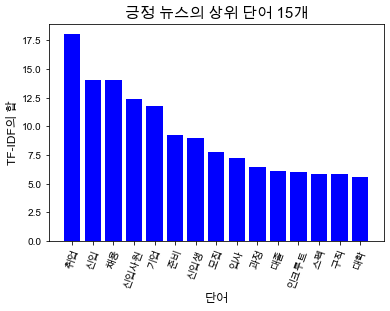

In [60]:
plt.bar(range(max), [i[1] for i in POS_words[:max]], color="blue")
plt.title('긍정 뉴스의 상위 단어 %d개' %max, fontsize=15)
plt.xlabel('단어', fontsize=12)
plt.ylabel('TF-IDF의 합', fontsize=12)
plt.xticks(range(max), [i[0] for i in POS_words[:max]], rotation=70)

plt.show()

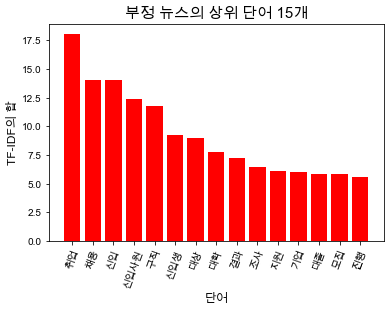

In [61]:
plt.bar(range(max), [i[1] for i in POS_words[:max]], color="red")
plt.title('부정 뉴스의 상위 단어 %d개' %max, fontsize=15)
plt.xlabel('단어', fontsize=12)
plt.ylabel('TF-IDF의 합', fontsize=12)
plt.xticks(range(max), [i[0] for i in NEG_words[:max]], rotation=70)

plt.show()

LDA 알고리즘 기반 토픽 분석

description 컬럼 추출

In [62]:
description=data_df['description']

형태소 토큰화 : 명사만 추출

In [63]:
description_noun_tk = []
for d in description:
    description_noun_tk.append(okt.nouns(d)) #형태소가 명사인 것만 추출

In [64]:
description_noun_tk2 = []

for d in description_noun_tk:
    item = [i for i in d if len(i) > 1] #토큰의 길이가 1보다 큰 것만 추출
    description_noun_tk2.append(item)

In [65]:
print(description_noun_tk2)

[['내달', '신입사원', '입사', '만큼', '취업', '준비', '라면', '연말', '접수', '속도', '추천', '취업', '포털', '인크루트', '집중', '기업', '대졸', '신입', '인턴', '채용', '소식', '안내', '먼저'], ['대학', '비교', '졸업', '취업률', '중도', '탈락', '신입생', '정량', '지표', '주로', '활용', '객관성', '유지', '계획', '수험생', '정보', '제공', '대학', '선택', '도움', '주기'], ['정규직', '신입사원', '선발', '비대', '화상', '면접', '진행', '코로나', '확산', '지속', '한국', '항공사', '취업', '준비', '도움', '최선', '계획'], ['제주항공', '언제', '고용', '한파', '상황', '다시', '취업', '전선', '기도', '지난해', '시기', '채용', '아시아나', '항공', '신입', '인력', '입사', '휴직', '전환'], ['예비', '신입생', '교수', '선배', '로부터', '학과', '교과', '과정', '진로', '취업', '대한', '조언', '학과', '교수', '직접', '참여', '일대일', '실시간', '상담', '통해', '입학', '대학', '생활', '졸업', '취업', '상담'], ['고재선', '취업', '지원', '실장', '소방', '안전', '학과', '교수', '코로나', '학교생활', '경험', '신입생', '도움', '재학생', '지지', '관계', '형성', '진로', '고민', '방안', '계속', '모색'], ['신종', '코로나바이러스', '감염증', '코로나', '확산', '신입사원', '교육', '방식', '지난', '이후', '취업', '수가', '개월', '연속', '정도', '채용', '시장', '꽁꽁', '네이버', '카카오', '국내', '주요', '기업', '경우'], ['건설', '취업', '플랫폼', '건설', '워커', '대

LDA 토픽 모델 구축

LDA 모델의 입력 벡터 생성


In [66]:
!pip install gensim

You should consider upgrading via the '/Users/kimhyeona/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [67]:
import gensim
import gensim.corpora as corpora

단어 사전 생성

In [68]:
dictionary = corpora.Dictionary(description_noun_tk2)

In [69]:
print(dictionary[1])

내달


단어와 출현빈도의 코퍼스 생성

In [70]:
corpus = [dictionary.doc2bow(word) for word in description_noun_tk2]

In [71]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1)], [(22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1)], [(9, 1), (16, 1), (20, 1), (23, 1), (25, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)], [(8, 1), (14, 1), (18, 1), (20, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1)], [(20, 2), (24, 1), (29, 1), (34, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 2), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 2)], [(20, 1), (25, 1), (29, 1), (49, 1), (71, 1), (83, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (

LDA모델 생성 및 훈련

In [72]:
K = 8 # 토픽의 개수 설정

In [73]:
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus, iterations=12, num_topics=K, id2word=dictionary, passes=1, workers=10)

LDA 토픽 모델 분석 결과 및 시각화

In [74]:
print(lda_model.print_topics(num_topics=K, num_words=15))

[(0, '0.039*"취업" + 0.028*"신입사원" + 0.023*"채용" + 0.016*"신입" + 0.013*"기업" + 0.011*"조사" + 0.011*"신입생" + 0.009*"과정" + 0.009*"대학" + 0.007*"교육" + 0.007*"학생" + 0.007*"결과" + 0.007*"모집" + 0.006*"면접" + 0.006*"올해"'), (1, '0.047*"취업" + 0.018*"채용" + 0.018*"신입사원" + 0.018*"신입생" + 0.017*"신입" + 0.012*"모집" + 0.012*"전형" + 0.009*"선발" + 0.009*"학년" + 0.009*"지원" + 0.008*"준비" + 0.008*"기업" + 0.008*"건설" + 0.007*"과정" + 0.007*"인크루트"'), (2, '0.048*"취업" + 0.031*"신입사원" + 0.030*"채용" + 0.022*"기업" + 0.018*"신입" + 0.009*"구직" + 0.009*"결과" + 0.009*"대상" + 0.009*"지원" + 0.008*"모집" + 0.007*"올해" + 0.007*"포털" + 0.007*"대학" + 0.007*"코로나" + 0.007*"인크루트"'), (3, '0.057*"취업" + 0.047*"신입" + 0.022*"채용" + 0.017*"구직" + 0.012*"신입사원" + 0.012*"지원" + 0.011*"준비" + 0.011*"결과" + 0.011*"대상" + 0.011*"조사" + 0.010*"잡코리아" + 0.009*"기업" + 0.008*"상반기" + 0.008*"입사" + 0.008*"포털"'), (4, '0.055*"취업" + 0.025*"신입" + 0.021*"채용" + 0.017*"신입생" + 0.013*"대학" + 0.012*"진행" + 0.011*"기업" + 0.011*"준비" + 0.010*"신입사원" + 0.008*"모집" + 0.007*"교육" + 0.007*"지원" + 0.006*"졸업" + 

In [75]:
!pip install pyLDAvis

You should consider upgrading via the '/Users/kimhyeona/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [76]:
import pyLDAvis.gensim

lda_vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

In [77]:
pyLDAvis.display(lda_vis)